## Mini Exercise
1. Load the titanic dataset that you've put together from previous lessons.
2. Split your data into training and test.
3. Fit a logistic regression model on your training data using sklearn's
   linear_model.LogisticRegression class. Use fare and pclass as the
   predictors.
4. Use the model's .predict method. What is the output?
5. Use the model's .predict_proba method. What is the output? Why do you
   think it is shaped like this?
6. Evaluate your model's predictions on the test data set. How accurate
   is the mode? How does changing the threshold affect this?

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

import acquire

In [2]:
df = acquire.get_titanic_data()
df = acquire.prep_titanic(df)
train, test = acquire.split_my_data(df, 0.8)
train = train.dropna()
test = test.dropna()
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,age_imp,C,Q,S,sex_enc,age_mm,fare_mm
179,179,0,3,male,36.00,0,0,0.0000,S,Third,Southampton,1,36.00,0.0,0.0,1.0,1,0.447097,0.000000
442,442,0,3,male,25.00,1,0,7.7750,S,Third,Southampton,0,25.00,0.0,0.0,1.0,1,0.308872,0.015176
469,469,1,3,female,0.75,2,1,19.2583,C,Third,Cherbourg,0,0.75,1.0,0.0,0.0,0,0.004147,0.037590
178,178,0,2,male,30.00,0,0,13.0000,S,Second,Southampton,1,30.00,0.0,0.0,1.0,1,0.371701,0.025374
254,254,0,3,female,41.00,0,2,20.2125,S,Third,Southampton,0,41.00,0.0,0.0,1.0,0,0.509927,0.039452


In [3]:
X_train = train[['fare_mm', 'pclass']]
y_train = train[['survived']]

X_test = test[['fare_mm', 'pclass']]
y_test = test[['survived']]

In [4]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_train)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [5]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.74907614, 0.25092386],
       [0.74618777, 0.25381223],
       [0.74188185, 0.25811815],
       ...,
       [0.74615048, 0.25384952],
       [0.33929103, 0.66070897],
       [0.74541789, 0.25458211]])

In [6]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.66


In [7]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.72


# Logistic Regression Exercises

In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

In [8]:
df = acquire.get_titanic_data()
df = df.drop(columns='deck')
df.dropna(inplace=True)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


In [9]:
# label encode sex column

le = preprocessing.LabelEncoder()
df['sex_enc'] = le.fit_transform(df.sex)

# One-hot encode embarked column

encoded_values = sorted(list(df['embarked'].unique()))
le = preprocessing.LabelEncoder()
enc = le.fit_transform(df['embarked'])
ohe_array = np.array(enc).reshape(len(enc), 1)
ohe = preprocessing.OneHotEncoder(sparse=False, categories='auto')
df_ohe = ohe.fit_transform(ohe_array)
enc = pd.DataFrame(data=df_ohe, columns=encoded_values, index=df.index)
df = df.join(enc)

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,sex_enc,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,1,0.0,0.0,1.0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,1.0,0.0,0.0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,0.0,0.0,1.0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0.0,0.0,1.0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,1,0.0,0.0,1.0


In [10]:
train, test = acquire.split_my_data(df, 0.8)
train, valid = acquire.split_my_data(train, 0.8)

test.shape, train.shape, valid.shape

((143, 16), (455, 16), (114, 16))

Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [11]:
X_train2 = train[['age', 'fare', 'pclass']]
X_valid2 = valid[['age', 'fare', 'pclass']]

y_train = train.survived
y_valid = valid.survived
y_test = test.survived

In [12]:
logit2 = LogisticRegression().fit(X_train2, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train2, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit2.score(X_valid2, y_valid)))

Accuracy of Logistic Regression classifier on training set: 0.72
Accuracy of Logistic Regression classifier on validation set: 0.67


Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [13]:
X_train3 = train[['age', 'fare', 'pclass', 'sex_enc']]
X_valid3 = valid[['age', 'fare', 'pclass', 'sex_enc']]

In [14]:
logit3 = LogisticRegression().fit(X_train3, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train3, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit3.score(X_valid3, y_valid)))

Accuracy of Logistic Regression classifier on training set: 0.79
Accuracy of Logistic Regression classifier on validation set: 0.80


Try out other combinations of features and models.

In [15]:
X_train4 = train[['age', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S']]
X_valid4 = valid[['age', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S']]

In [16]:
logit4 = LogisticRegression().fit(X_train4, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit4.score(X_train4, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit4.score(X_valid4, y_valid)))

Accuracy of Logistic Regression classifier on training set: 0.79
Accuracy of Logistic Regression classifier on validation set: 0.82


In [17]:
X_train5 = train[['age', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]
X_valid5 = valid[['age', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]

In [18]:
logit5 = LogisticRegression().fit(X_train5, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit5.score(X_train5, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit5.score(X_valid5, y_valid)))

Accuracy of Logistic Regression classifier on training set: 0.81
Accuracy of Logistic Regression classifier on validation set: 0.80


In [19]:
# evaluation df of all models

evaluation = pd.DataFrame({
    'actual': y_valid
})

evaluation['model_2'] = logit2.predict_proba(X_valid2)[:, 1]
evaluation['model_3'] = logit3.predict_proba(X_valid3)[:, 1]
evaluation['model_4'] = logit4.predict_proba(X_valid4)[:, 1]
evaluation['model_5'] = logit5.predict_proba(X_valid5)[:, 1]
evaluation.head()

,actual,model_2,model_3,model_4,model_5
550,1,0.796884,0.526570,0.594480,0.571007
160,0,0.151692,0.082922,0.076082,0.072832
556,1,0.476237,0.805430,0.850472,0.815924
553,1,0.267263,0.120802,0.157537,0.175651
307,1,0.795125,0.909716,0.931379,0.937473


In [20]:
import util

util.plot_metrics_by_thresholds(
    evaluation.actual, evaluation['model_2']
)

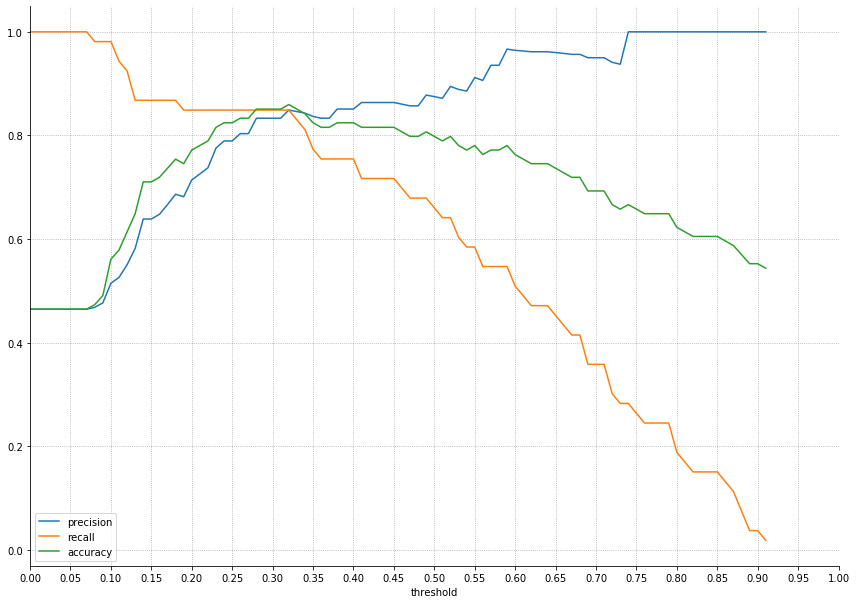

In [21]:
util.plot_metrics_by_thresholds(
    evaluation.actual, evaluation['model_3']
)

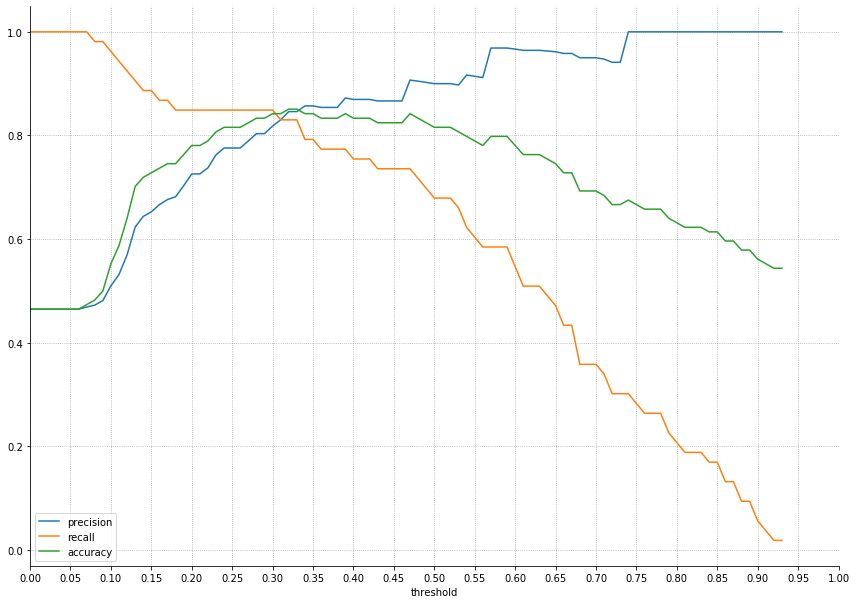

In [22]:
util.plot_metrics_by_thresholds(
    evaluation.actual, evaluation['model_4']
)

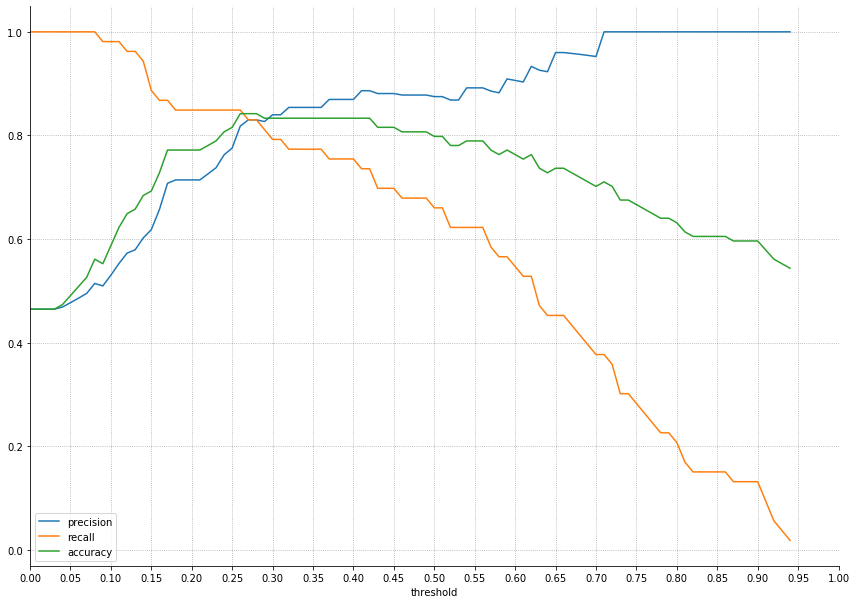

In [23]:
util.plot_metrics_by_thresholds(
    evaluation.actual, evaluation['model_5']
)

Choose you best model and evaluate it on the test dataset. Is it overfit?

In [24]:
X_test = test[['age', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit5.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.80


Bonus How do different strategies for handling the missing values in the age column affect model performance?

In [25]:
df = acquire.get_titanic_data()
df = df.drop(columns='deck')
df.embarked = df.embarked.fillna('S')

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


In [26]:
df[df.age.isna()].head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,Queenstown,1
17,17,1,2,male,NaN,0,0,13.0000,S,Second,Southampton,1
19,19,1,3,female,NaN,0,0,7.2250,C,Third,Cherbourg,1
26,26,0,3,male,NaN,0,0,7.2250,C,Third,Cherbourg,1
28,28,1,3,female,NaN,0,0,7.8792,Q,Third,Queenstown,1


In [27]:
df['age_imp'] = df["age"].fillna(df.groupby("pclass")["age"].transform("mean"))

In [28]:
df[df.age.isna()].head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,age_imp
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,Queenstown,1,25.14062
17,17,1,2,male,NaN,0,0,13.0000,S,Second,Southampton,1,29.87763
19,19,1,3,female,NaN,0,0,7.2250,C,Third,Cherbourg,1,25.14062
26,26,0,3,male,NaN,0,0,7.2250,C,Third,Cherbourg,1,25.14062
28,28,1,3,female,NaN,0,0,7.8792,Q,Third,Queenstown,1,25.14062


In [29]:
# label encode sex column

le = preprocessing.LabelEncoder()
df['sex_enc'] = le.fit_transform(df.sex)

# One-hot encode embarked column

encoded_values = sorted(list(df['embarked'].unique()))
le = preprocessing.LabelEncoder()
enc = le.fit_transform(df['embarked'])
ohe_array = np.array(enc).reshape(len(enc), 1)
ohe = preprocessing.OneHotEncoder(sparse=False, categories='auto')
df_ohe = ohe.fit_transform(ohe_array)
enc = pd.DataFrame(data=df_ohe, columns=encoded_values, index=df.index)
df = df.join(enc)

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,age_imp,sex_enc,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,22.0,1,0.0,0.0,1.0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,38.0,0,1.0,0.0,0.0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,26.0,0,0.0,0.0,1.0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,35.0,0,0.0,0.0,1.0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,35.0,1,0.0,0.0,1.0


In [30]:
train, test = acquire.split_my_data(df, 0.8)
train, valid = acquire.split_my_data(train, 0.8)

test.shape, train.shape, valid.shape

((179, 17), (569, 17), (143, 17))

In [31]:
X_train = train[['age_imp', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]
X_valid = valid[['age_imp', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]

y_train = train.survived
y_valid = valid.survived

In [32]:
logit6 = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit6.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit6.score(X_valid, y_valid)))

Accuracy of Logistic Regression classifier on training set: 0.82
Accuracy of Logistic Regression classifier on validation set: 0.78


In [33]:
X_test = test[['age_imp', 'fare', 'pclass', 'sex_enc', 'C', 'Q', 'S', 'sibsp', 'parch']]
y_test = test.survived

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit5.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.79


## Decision Tree Exercises

### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [34]:
titanic = acquire.get_titanic_data()

In [35]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df = acquire.prep_titanic(titanic)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,age_imp,C,Q,S,sex_enc,age_mm,fare_mm
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,22.0,0.0,0.0,1.0,1,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,38.0,1.0,0.0,0.0,0,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,26.0,0.0,0.0,1.0,0,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,35.0,0.0,0.0,1.0,0,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,35.0,0.0,0.0,1.0,1,0.434531,0.015713


In [37]:
train, test = acquire.split_my_data(df, 0.8)
train, valid = acquire.split_my_data(train, 0.8)

test.shape, train.shape, valid.shape

((179, 21), (569, 21), (143, 21))

In [38]:
X_train = train[['pclass', 'sibsp', 'parch', 'C', 'Q', 'S', 'sex_enc', 'age_mm', 'fare_mm']]
X_valid = valid[['pclass', 'sibsp', 'parch', 'C', 'Q', 'S', 'sex_enc', 'age_mm', 'fare_mm']]
X_test = test[['pclass', 'sibsp', 'parch', 'C', 'Q', 'S', 'sex_enc', 'age_mm', 'fare_mm']]

y_train = train.survived
y_valid = valid.survived
y_test = test.survived

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123).fit(X_train, y_train)
y_pred = clf.predict(X_train)

### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [40]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [41]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,348,9
survived,68,144


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       357
           1       0.94      0.68      0.79       212

    accuracy                           0.86       569
   macro avg       0.89      0.83      0.84       569
weighted avg       0.88      0.86      0.86       569



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [43]:
print('Accuracy: 86%')
print('TP: 144')
print('FP: 9')
print('TN: 348')
print('FN: 68')
print('Precision: 89%')
print('Recall: 83%')
print('F1-score: 84%')
print('Support: 569')

Accuracy: 86%
TP: 144
FP: 9
TN: 348
FN: 68
Precision: 89%
Recall: 83%
F1-score: 84%
Support: 569


In [44]:
import graphviz
from graphviz import Graph
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [45]:
y_pred = clf.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        81
           1       0.93      0.60      0.73        62

    accuracy                           0.80       143
   macro avg       0.84      0.78      0.79       143
weighted avg       0.83      0.80      0.79       143



### Run through steps 2-4 using entropy as your measure of impurity.

In [46]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [47]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,345,12
survived,68,144


In [48]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       357
           1       0.92      0.68      0.78       212

    accuracy                           0.86       569
   macro avg       0.88      0.82      0.84       569
weighted avg       0.87      0.86      0.85       569



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [49]:
print('Accuracy: 86%')
print('TP: 144')
print('FP: 12')
print('TN: 345')
print('FN: 68')
print('Precision: 88%')
print('Recall: 82%')
print('F1-score: 84%')
print('Support: 569')

Accuracy: 86%
TP: 144
FP: 12
TN: 345
FN: 68
Precision: 88%
Recall: 82%
F1-score: 84%
Support: 569


In [50]:
import graphviz
from graphviz import Graph
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [51]:
y_pred = clf.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        81
           1       0.90      0.60      0.72        62

    accuracy                           0.80       143
   macro avg       0.83      0.77      0.78       143
weighted avg       0.82      0.80      0.79       143



## Random Forest Exercises

### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

### Evaluate your results using the model score, confusion matrix, and classification report.

In [53]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.99


In [54]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,356,1
survived,6,206


In [55]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       357
           1       1.00      0.97      0.98       212

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569



In [56]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_valid, y_valid)))

Accuracy of random forest classifier on test set: 0.78


In [57]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.84


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [58]:
print('Accuracy: 99%')
print('TP: 206')
print('FP: 1')
print('TN: 356')
print('FN: 6')
print('Precision: 99%')
print('Recall: 98%')
print('F1-score: 99%')
print('Support: 569')

Accuracy: 99%
TP: 206
FP: 1
TN: 356
FN: 6
Precision: 99%
Recall: 98%
F1-score: 99%
Support: 569


### Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [59]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=5, n_estimators=100, max_depth=3, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [60]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.83


In [61]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,326,31
survived,64,148


In [62]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       357
           1       0.83      0.70      0.76       212

    accuracy                           0.83       569
   macro avg       0.83      0.81      0.81       569
weighted avg       0.83      0.83      0.83       569



In [63]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

> Interestingly, the first model performed better on the test set than the second model did on the training set! I think this is because the first model had more depth, and therefore more chances to make accurate splits in the data. The second model had a depth of only 3, so it had to generalize more, and it lost granularity.

## KNN Exercises

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

### Evaluate your results using the model score, confusion matrix, and classification report.

In [65]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.86


In [66]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,330,27
survived,54,158


In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       357
           1       0.85      0.75      0.80       212

    accuracy                           0.86       569
   macro avg       0.86      0.83      0.84       569
weighted avg       0.86      0.86      0.86       569



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [68]:
print('Accuracy: 86%')
print('TP: 158')
print('FP: 27')
print('TN: 330')
print('FN: 54')
print('Precision: 86%')
print('Recall: 83%')
print('F1-score: 84%')
print('Support: 569')

Accuracy: 86%
TP: 158
FP: 27
TN: 330
FN: 54
Precision: 86%
Recall: 83%
F1-score: 84%
Support: 569


### Run through steps 2-4 setting k to 10

In [69]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform').fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [70]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [71]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,333,24
survived,75,137


In [72]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       357
           1       0.85      0.65      0.73       212

    accuracy                           0.83       569
   macro avg       0.83      0.79      0.80       569
weighted avg       0.83      0.83      0.82       569



In [73]:
print('Accuracy: 78%')
print('TP: 105')
print('FP: 17')
print('TN: 340')
print('FN: 107')
print('Precision: 81%')
print('Recall: 72%')
print('F1-score: 74%')
print('Support: 569')

Accuracy: 78%
TP: 105
FP: 17
TN: 340
FN: 107
Precision: 81%
Recall: 72%
F1-score: 74%
Support: 569


### Run through steps 2-4 setting k to 20

In [74]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform').fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [75]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [76]:
labels = ['died', 'survived']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,died predicted,survived predicted
actual,,
died,336,21
survived,80,132


In [77]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       357
           1       0.86      0.62      0.72       212

    accuracy                           0.82       569
   macro avg       0.84      0.78      0.80       569
weighted avg       0.83      0.82      0.81       569



In [78]:
print('Accuracy: 74%')
print('TP: 75')
print('FP: 13')
print('TN: 344')
print('FN: 137')
print('Precision: 74%')
print('Recall: 66%')
print('F1-score: 66%')
print('Support: 569')

Accuracy: 74%
TP: 75
FP: 13
TN: 344
FN: 137
Precision: 74%
Recall: 66%
F1-score: 66%
Support: 569


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

> The model with k=5 performed best. I think this is because the data isn't terribly separated out.

In [79]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.80


## Test

### For both the iris and the titanic data,

1. Determine which model (with hyperparameters) performs the best (try reducing the number of features to the top 4 features in terms of information gained for each feature individually).

> The rf model with max_depth of 20 performed at 99% accuracy.
- Top 4 features: pclass, sex_enc, age_mm, fare_mm

2. Create a new dataframe with top 4 features.

In [80]:
X_train = train[['pclass', 'sex_enc', 'age_mm', 'fare_mm']]
X_valid = valid[['pclass', 'sex_enc', 'age_mm', 'fare_mm']]
X_test = test[['pclass', 'sex_enc', 'age_mm', 'fare_mm']]

y_train = train.survived
y_valid = valid.survived
y_test = test.survived

3. Use the top performing algorithm with the metaparameters used in that model. Create the object, fit, transform on in-sample data, and evaluate the results with the training data. Compare your evaluation metrics with those from the original model (with all the features).

In [81]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       357
           1       0.99      0.97      0.98       212

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



> This new model's performance decreased only slightly, from 99% accuracy to 98%

4. Run your final model on your out-of-sample dataframe (test_df). Evaluate the results.

In [82]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       111
           1       0.79      0.76      0.78        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



> Again, the model performed similarly to the model run with all the features. The accuracy decreased from 84% to 83%. In my opinion, that is acceptable.

In [83]:
# Iris data

iris = acquire.get_iris_data()

train, test = acquire.split_my_data(iris, 0.8)
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
97,2,98,6.2,2.9,4.3,1.3,versicolor
64,2,65,5.6,2.9,3.6,1.3,versicolor
126,3,127,6.2,2.8,4.8,1.8,virginica
98,2,99,5.1,2.5,3.0,1.1,versicolor
90,2,91,5.5,2.6,4.4,1.2,versicolor


In [84]:
X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y_train = train.species_name
y_test = test.species_name

In [85]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       1.00      1.00      1.00        39
   virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [86]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Feature Engineering

### Titanic Data
### Create a feature named who, this should be either man, woman, or child. How does including this feature affect your model's performance?

In [87]:
df = acquire.get_titanic_data()
df = acquire.prep_titanic(df)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,age_imp,C,Q,S,sex_enc,age_mm,fare_mm
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,22.0,0.0,0.0,1.0,1,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,38.0,1.0,0.0,0.0,0,0.472229,0.139136
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,26.0,0.0,0.0,1.0,0,0.321438,0.015469
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,35.0,0.0,0.0,1.0,0,0.434531,0.103644
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,35.0,0.0,0.0,1.0,1,0.434531,0.015713


In [88]:
df['who'] = np.where(df.age_imp <= 16, 'child',
                    np.where(df.sex == 'male', 'man', 'woman'))
df['who_enc'] = np.where(df.who == 'male', '1',
                        np.where(df.who == 'female', '2', '3'))
df.who.value_counts()

man      526
woman    265
child    100
Name: who, dtype: int64

In [89]:
train, test = acquire.split_my_data(df, 0.8)

X_train = train[['pclass', 'sex_enc', 'age_mm', 'fare_mm', 'who_enc']]
X_test = test[['pclass', 'sex_enc', 'age_mm', 'fare_mm', 'who_enc']]

y_train = train.survived
y_test = test.survived

In [90]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       438
           1       0.99      0.96      0.97       274

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [91]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



> Adding the who column didn't change anything

### Create a feature named adult_male that is either a 1 or a 0. How does this affect your model's predictions?

In [92]:
df['adult_male'] = np.where(df.who_enc == 1, '1', '0')

train, test = acquire.split_my_data(df, 0.8)

X_train = train[['pclass', 'sex_enc', 'age_mm', 'fare_mm', 'adult_male']]
X_test = test[['pclass', 'sex_enc', 'age_mm', 'fare_mm', 'adult_male']]

y_train = train.survived
y_test = test.survived

In [93]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       438
           1       0.99      0.96      0.97       274

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [94]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



> adding adult_male column didn't change anything

### Create features named petal_area and sepal_area.

In [95]:
# Iris data

iris = acquire.get_iris_data()
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

train, test = acquire.split_my_data(iris, 0.8)
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area,sepal_area
97,2,98,6.2,2.9,4.3,1.3,versicolor,5.59,17.98
64,2,65,5.6,2.9,3.6,1.3,versicolor,4.68,16.24
126,3,127,6.2,2.8,4.8,1.8,virginica,8.64,17.36
98,2,99,5.1,2.5,3.0,1.1,versicolor,3.30,12.75
90,2,91,5.5,2.6,4.4,1.2,versicolor,5.28,14.30


In [96]:
X_train = train[['sepal_area', 'petal_area']]
X_test = test[['sepal_area', 'petal_area']]

y_train = train.species_name
y_test = test.species_name

In [97]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=1, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       1.00      1.00      1.00        39
   virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [98]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

